# DM/TP: Programmation des différents algorithmes vus en cours.

Tous les test se font en dimension deux pour pouvoir visualiser la convergence, mais les algorithmes sont bien sûr écrits pour des problèmes de minimisation en dimension arbitraire.

On charge les librairies python.

In [145]:
import numpy as np
import numpy.linalg as la
import math
import numpy.random as rd
import matplotlib.pyplot as plt

Les fonctions seront de la forme $f(x,p)$ où $x$ sera la variable et $p$ un ensemble de paramètres permettant de faire varier la fonction.
On passera  aussi une fonction gradf permettant de calculer le gradient.

## I)Recherche linéaire: Programmer la méthode de backtracking 6.8

In [65]:
def back_tracking(f, gradf, parameters, x, d, mu, nu):
    #mu<=1/2 
    #nu<1
    #d: direction de descente
    #f: la fonction à minimiser
    #gradf: le gradient de la fonction à minimiser
    #parameters_: les paramètres utiles à l'évaluation de f et de son gradient
    #x: le point courant qui vient de gradient function
    
    t=1
    fx=f(x, parameters)
    
    gdt=gradf(x, parameters)
    
    aux=t*mu*np.dot(gdt,d)
    
    y=x+t*d
    
    fy=f(y, parameters)
    
    while fy > (fx+aux):
        t = t*nu
        y = x + t*d
        fy = f(y, parameters)
        aux = t*mu*np.dot(gdt,d)
    return t

## II) Méthode de descente: Programmer l'algoritme de descente 6.5

La direction de descente sera $d=-\frac{\nabla_x f}{\Vert \nabla_x f\Vert}$
On sauvegardera la suite des approximations du minimiseur x et la suite des normes du gradient dans deux listes, 'listx' et 'normgradv', que l'on retournera avec la valeur trouvée.
Enfin on passera à la fonction 'itmax' et 'tol', l'algorithme s'arrêtera lorsque la norme du gradient est plus petite que 'tol' ou si le compteur d'itérations atteint le nombre maximal d'itérations 'itmax'.

In [96]:
def gradient_and_backtracking( f, gradf, parameters, x,  tol, itmax):
 
    #f: la fonction à minimiser
    #gradf: le gradient de la fonction à minimiser
    #parameters_: les paramètres utiles à l'évaluation de f et de son gradient
    #x: valeur de départ
    # tol : tolérance pour le test d'arret
    # itmax : nombre maximal d'itérations
    mu=0.25   # mu<=1/2 
    nu=0.8        #nu<1
    listx=[x]      #liste contenant la suite des approximations du minimiseur
    normgradv=[]   # tableau contenant les normes des gradients 
    grad=gradf(x, parameters)
    normgrad=la.norm(grad)
    it=0      # compteur d'iterations
    
    d = -grad/normgrad
    normgradv.append(normgrad)
    d = -grad/normgradv[0]
    
    while normgrad > tol and it < itmax:
        
        
        #Computation of new value of t
        t = back_tracking(f, gradf, parameters, x, d, mu, nu)
        x = x + t*d
        #print("New value of x: ", x)
        
        # Update of vectors for output
        grad = gradf(x, parameters)
        normgrad = la.norm(grad)
        normgradv.append(normgrad)
        listx.append(x)
        
        it += 1
        d = -grad/normgrad
    print("Total iterations computed: ", it)
    print("Final x value: ", x)
    print("Final norm value: ", normgrad)
    return x, normgradv, listx

### Tester votre algorithme.
On définit ci-dessous une fonction calculant $f(x)= \frac{1}{2} \langle A(x-v),a-v\rangle$ pour $A$ symétrique définie positive et $v$ donné. On définit également deux fonctions calculant le gradient et la hessienne. 

In [66]:
def quadratic(x, parameters):
    #parameters is a list
    #parameters[0] is a square SPD matrix A
    #parameters[1] is a vector v
    # f(x) = 1/2  (x-v)^ˆTA(x-v)
    e=x-parameters[1]
    return 0.5 *np.dot(np.dot(parameters[0],e),e)

def grad_quadratic(x, parameters):
    #parameters is a list
    #parameters[0] is a square SPD matrix A
    #parameters[1] is a vector v
    # f(x) = 1/2  (x-v)^ˆTA(x-v)
    e=x-parameters[1]
    return np.dot(parameters[0],e)
    
def hessian_quadratic(x,parameters):
    #parameters is a list
    #parameters[0] is a square SPD matrix A
    #parameters[1] is a vector v
    # f(x) = 1/2  (x-v)^ˆTA(x-v)
    return parameters[0]

On va prendre $A=\begin{pmatrix} 1& 0\\0&10 \end{pmatrix}$ et $v=\begin{pmatrix} 0\\ -0,5\end{pmatrix}$, on peut remplacer par $A=\begin{pmatrix} 1& 0\\0&10^6 \end{pmatrix}$ si on souhaite observer l'effet du conditionnement. 

In [97]:
diag=[1.0,10.0]
  
n=len(diag)
M=np.diag(diag)

v=-0.5*np.arange(n)

parameters=[M,v]


x=np.array([1,1])   #initialisation 
#x=rd.rand(n)  autre initialisation

[z, normgv, listx]=gradient_and_backtracking( quadratic, grad_quadratic, parameters, x,  1e-6, 10000)

Total iterations computed:  73
Final x value:  [ 4.77557859e-07 -4.99999924e-01]
Final norm value:  8.955907134739003e-07


On observe à quelle vitesse décroit le gradient (en échelle logarithmique).

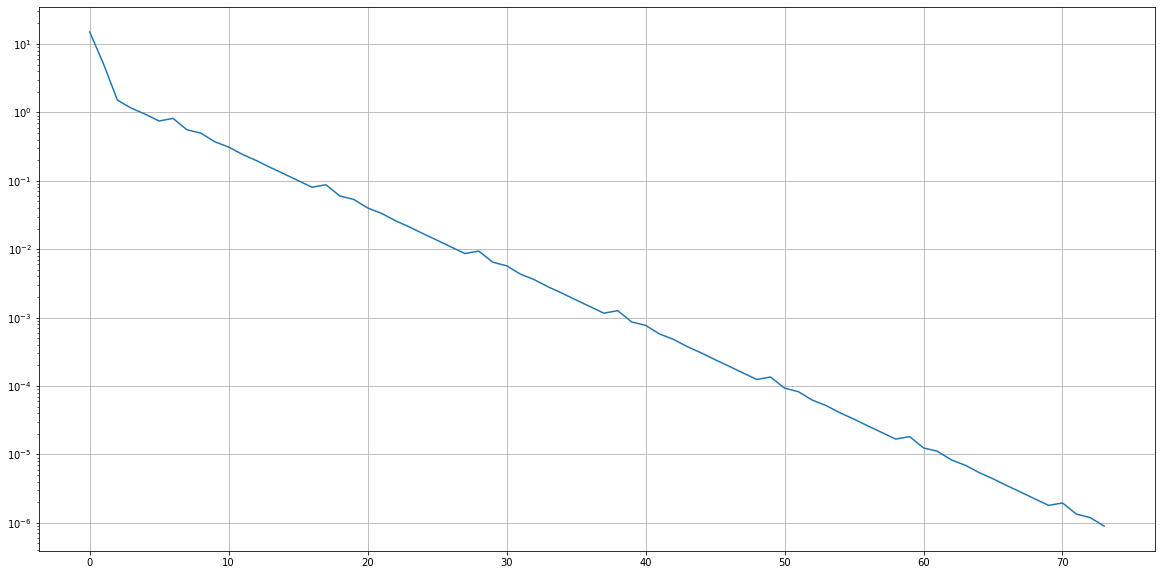

In [82]:
plt.figure(figsize=(20,10))
plt.plot(normgv)
plt.grid()
plt.yscale('log')
plt.show()

On observe également la convergence de la suite des approximations superposées aux lignes de niveaux.

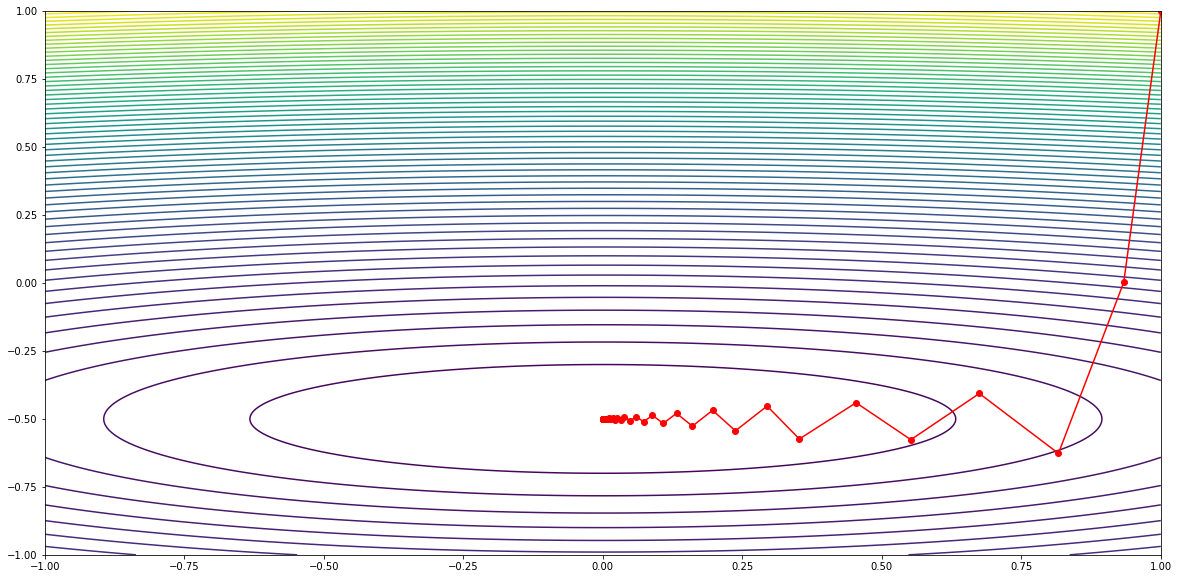

In [84]:
xx = np.linspace(-1, 1, 1000)
yy = np.linspace(-1, 1, 1000)
xxv, yyv = np.meshgrid(xx, yy)
z = 0.5*parameters[0][0,0]*(xxv-parameters[1][0])*(xxv-parameters[1][0])+0.5*parameters[0][1,1]*(yyv-parameters[1][1])*(yyv-parameters[1][1])
plt.figure(figsize=(20,10))
h = plt.contour(xxv,yyv,z, 60)
ax=[]
ay=[]
for v in listx:
    ax=np.append(ax,v[0])
    ay=np.append(ay,v[1])
plt.plot(ax,ay ,'-ro')
plt.show()

## III) Méthode de Newton: programmer la méthode de Newton avec backtracking 6.24.

On peut résoudre un système linéaire $Ax=b$ via la commande la.solve(A,b)

On pensera aussi à vérifier que $\delta^2 >\epsilon$ avant de commencer les itérations.
On renverra aussi la liste des approximations du minimiseur  $x$ et des décréments de Newton $\delta$. Enfin on passera à la fonction 'itmax' et 'tol', l'algorithme s'arrête lorsque $\delta$ est plus petit que 'tol' ou si le compteur d'itérations atteint le nombre maximal d'itérations 'itmax

In [98]:
def newton_opt( f, gradf, hessianf, parameters,x,  tol, delta, itmax ):
    #f_: la fonction à minimiser
    #gradf_: le gradient de la fonction à minimiser
    #hessianf_    : la hessienne de la fonction à minimiser
    #parameters_: les paramètres utiles à l'évaluation de f, de son gradient et sa hessienne
    #x: valeur initiale
    # tol : tolérance pour le test d'arret
    # delta: le decrement de newton dans les iterations, mais initialisé à un nombre réel positif
    # itmax : nombre maximal d'itérations
    mu=0.25   # mu<=1/2 
    nu=0.8        #nu<1
    delta2 = delta**2  
    if delta2 < tol:
        print("mauvais choix de delta:  delta doit etre plus grand que :", math.sqrt(tol))
    else:
        it=0      # compteur d'iterations
        deltav=[delta] #la liste des decrements de Newton 
        listx=[x] #la liste des approximations du minimiseur
        while delta2 > tol and it < itmax:
            # Gradient and hessian matrix of function
            grad = gradf(x, parameters)
            hessian = hessianf(x, parameters)
            
            dtx = la.solve(hessian,-grad)
            delta = math.sqrt(np.dot(-grad,dtx))
            
            t = back_tracking(f, gradf, parameters, x, dtx, mu, nu)
            x = x + t*dtx
            
            deltav.append(delta)
            delta2 = delta**2
            listx.append(x)
            it += 1
            
        print("Total iterations computed: ",it)
        print("Final x values: ", x)
        print("Final delta values: ", deltav)
        return x, listx, deltav

### Tester votre algorithme.
on va définir $f(x)= \frac{1}{2} \langle A(x-v),a-v\rangle +a e^{x_1}$ pour $A$ et $v$ comme ci-dessus et $a$ réel.

In [86]:
#f2 is obtained by a adding to the quadratic function quadratic_f defined above  by an exponential of the first coordinate

def f2(x, parameters):
    return quadratic(x, parameters)+ parameters[2]* math.exp(x[0])

def gradf2(x, parameters):
    gd=grad_quadratic(x, parameters)
    gd[0]=gd[0]+parameters[2]* math.exp(x[0])
    return gd
    
def hessianf2(x,parameters):
    mm=np.copy(parameters[0])
    mm[0,0]=mm[0,0]+parameters[2]* math.exp(x[0])
    return mm

On calcule le minimiseur et on affiche les décréments de Newton (en échelle logarithmique).

Total iterations computed:  6
Final x values:  [-1.20216787 -0.5       ]
Final delta values:  [0.5, 3.6496273333582616, 1.0638357559397456, 0.21705125254775226, 0.008804433814018008, 1.4268302465567484e-05, 3.744593844435695e-11]


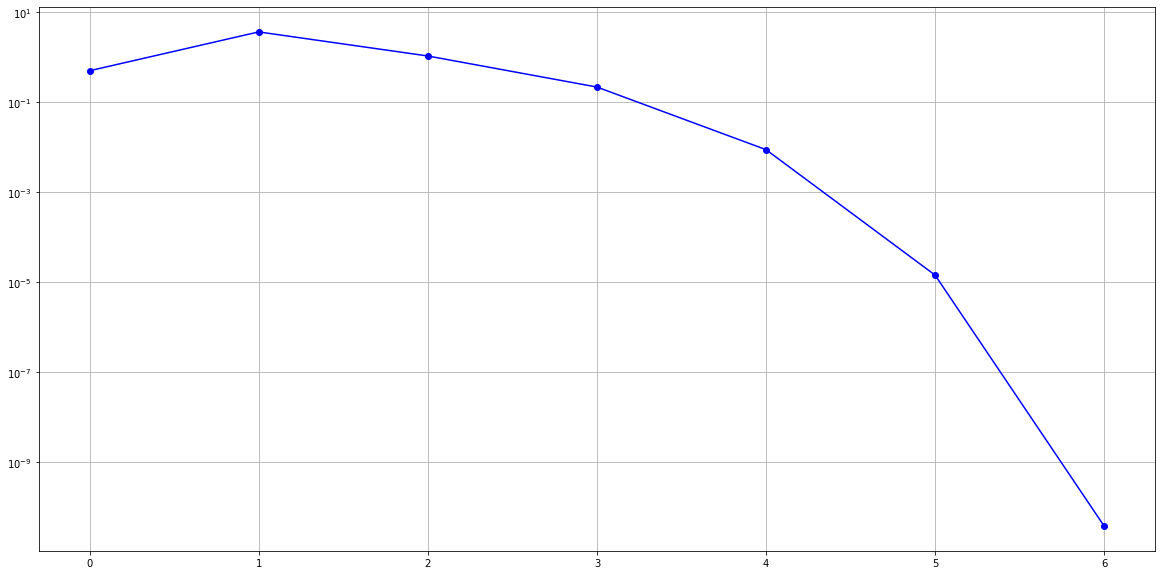

In [99]:
a=4.0
parameters=[M,v,a]

x=rd.rand(n)
[x2,listx2,deltav]=newton_opt( f2, gradf2, hessianf2, parameters, x,  1e-10, 0.5, 100)

plt.figure(figsize=(20,10))
plt.plot( deltav,'-bo')
#plt.xscale('log')
plt.grid()
plt.yscale('log')

plt.show()

On observe également la convergence de la suite des approximations superposées aux lignes de niveaux.

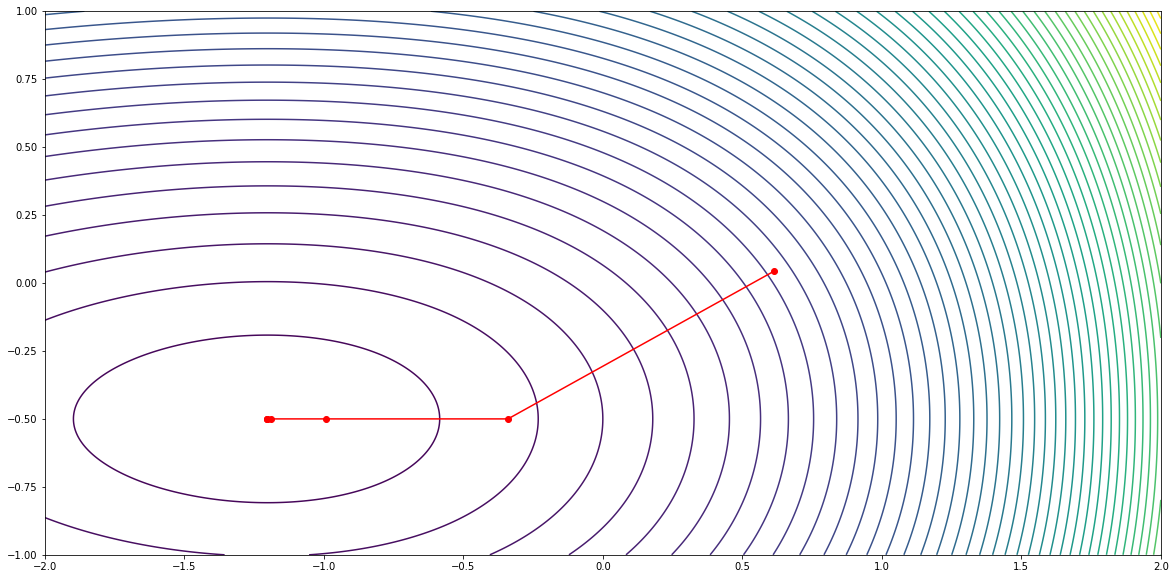

In [89]:
ax=[]
ay=[]
for v in listx2:
    ax=np.append(ax,v[0])
    ay=np.append(ay,v[1])
xx = np.linspace(-2, 2, 1000)
yy = np.linspace(-1, 1, 1000)
xxv, yyv = np.meshgrid(xx, yy)
z = 0.5*parameters[0][0,0]*(xxv-parameters[1][0])*(xxv-parameters[1][0])+0.5*parameters[0][1,1]*(yyv-parameters[1][1])*(yyv-parameters[1][1])
z2=z+parameters[2]*np.exp(xxv)

plt.figure(figsize=(20,10)) # Increasing the size of the plot for better visualization
h2 = plt.contour(xxv,yyv,z2, 60)
plt.plot(ax,ay ,'-ro')
plt.show()

## IV) Définir une fonction qui calcule le point promixal pour $g(x)=\Vert x\Vert_1$ comme dans l'exercice 7.21, c'est à dire le minimiseur de $y\mapsto g(x) +\frac{1}{2t} \Vert x-y\Vert^2$, voir aussi TD6 exercice 5.

In [100]:
def proxi_norm_un(y, t):
    # the function returns the minimizer of z -> 2t ||z||_1 + ||z-y||^2
    x = []
    for i in range(len(y)):
        if y[i] > t:
            x.append(y[i]-t)
            
        elif y[i] >= -t and y[i] <= t:
            x.append(0)
            
        elif y[i]<-t:
            x.append(y[i]+t)
            
    return np.array(x) # We need to transform into a numpy array to be able to perform the norm of |x_k1-x_k|

## V) Programmer la méthode de splitting  8.2, avec $f_1(x)=f(x)$ et $f_2(x)=\Vert x\Vert_1$

LA fonction retournera le minimiseur, la liste des $x_k$ et aussi la liste des normes $\Vert x_{k+1}-x_k\Vert$
L'algorithme s'arrête quand cette norme est plus petite que la tolérance ou si le compteur d'itérations atteint le nombre d'itérations maximal.

In [101]:
def fixed_step_explicit_implicit(f, gradf,parameters, x,t,tol,itmax):
    #f: la partie reguliere de fonction à minimiser
    #gradf: le gradient de la partie reguliere de la fonction à minimiser
    #parameters_: les paramètres utiles à l'évaluation de f et de son gradient
    #x: initial guess
    #t: le pas fixe
    # tol : tolérance pour le test d'arret
    # itmax : nombre maximal d'itérations
    #y=np.copy(x)
    delta=1             #delta: norme de l'increment entre 2 approximations successives
    deltav=[]           # liste des normes des increments 
    listx=[x]           # liste des approximations
    it=0                # compteur d'iterations
    deltav.append(delta)
    
    while deltav[it] > tol and it < itmax:
        
        x_k = listx[it]
        yk = x_k - t*gradf(x_k, parameters)
        x = proxi_norm_un(yk,t)
        
        listx.append(x)
        delta = la.norm(x-x_k)
        
        deltav.append(delta)
        it += 1
        
    print("Total iterations computed: ", it)
    print("Final x values: ", x)
    print("Final delta values: ", delta)
    return x,deltav,listx

### Tester votre algorithme.

In [102]:
parameters=[M,v, 1.0]

x=1.5*rd.rand(n)

[x3, normd,listx3]=fixed_step_explicit_implicit(quadratic, grad_quadratic,parameters, x,0.01,1e-10,20000)

Total iterations computed:  198
Final x values:  [ 0.  -0.4]
Final delta values:  9.128686695447641e-11


On observe à quelle vitesse décroit la norme de l'incrément $\Vert x_{k+1}-x_k\Vert$ (en échelle logarithmique).

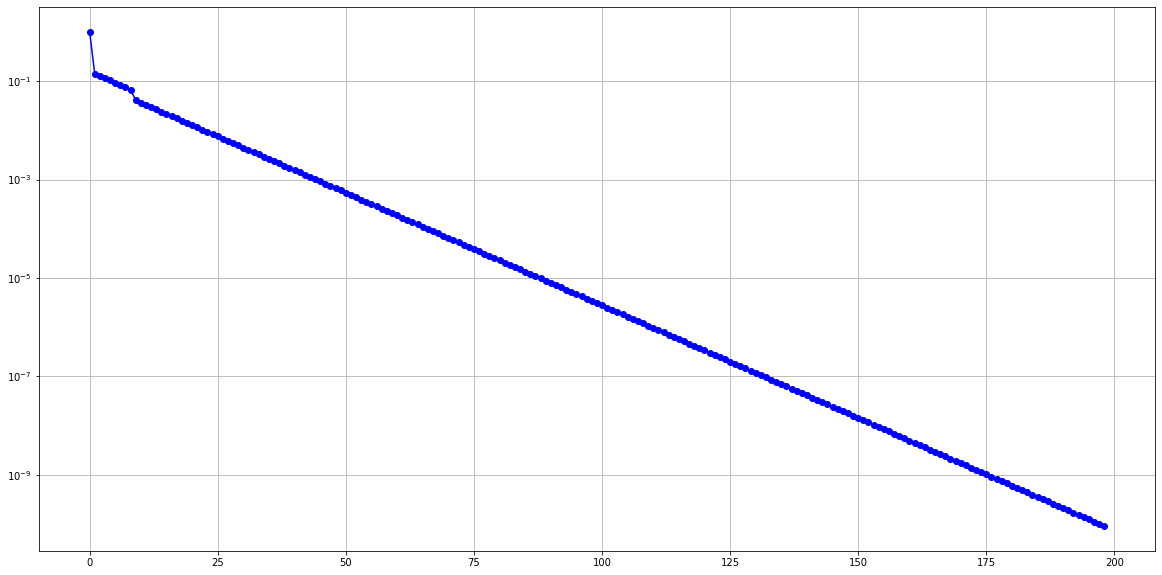

In [103]:
plt.figure(figsize=(20,10))
plt.plot(normd,'-bo')
#plt.xscale('log')
plt.grid()
plt.yscale('log')
#plt.savefig("conv_newtona.pdf", bbox_inches='tight')
plt.show()

On observe également la convergence de la suite des approximations superposées aux lignes de niveaux.

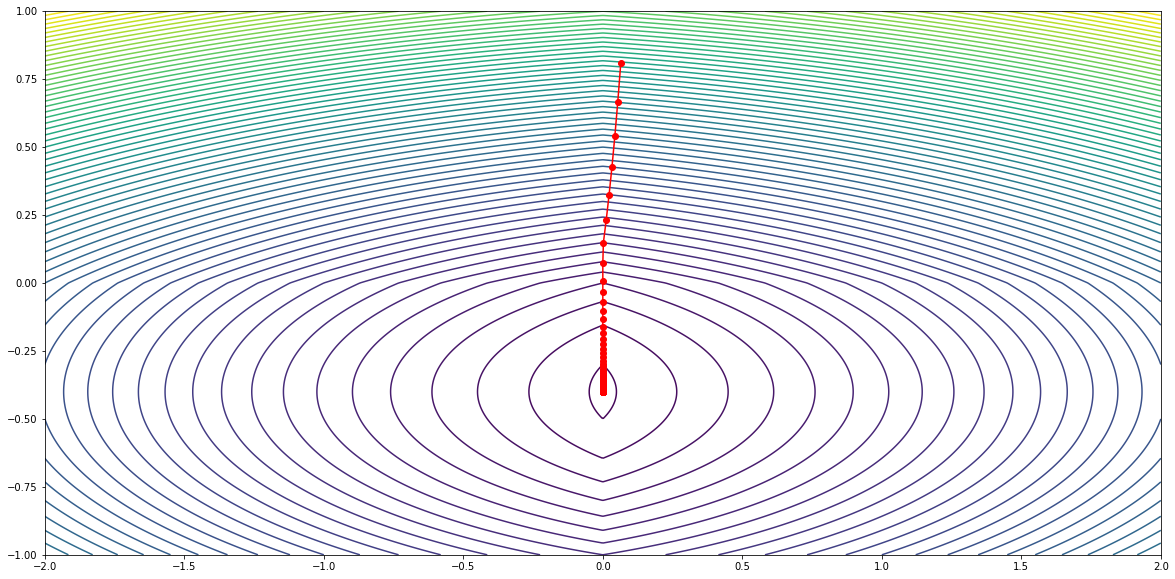

In [106]:
ax=[]   
ay=[]
for v in listx3:
    ax=np.append(ax,v[0])
    ay=np.append(ay,v[1])
plt.figure(figsize=(20,10))
plt.plot(ax,ay ,'-ro')
xx = np.linspace(-2, 2, 1000)
yy = np.linspace(-1, 1, 1000)
xxv, yyv = np.meshgrid(xx, yy)
z = 0.5*parameters[0][0,0]*(xxv-parameters[1][0])*(xxv-parameters[1][0])+0.5*parameters[0][1,1]*(yyv-parameters[1][1])*(yyv-parameters[1][1])
z2 =z+ parameters[2]* (np.abs(xxv)+ np.abs(yyv))
h = plt.contour(xxv,yyv,z2, 70)
plt.show()

## VI)  Méthode de Douglas-Rachord.
$f_2(x)=r\Vert R_\theta (x-v)\Vert_1$ où $R_\theta =\begin{pmatrix} \cos(\theta) & \sin(\theta)\\
-\sin(\theta) & \cos(\theta) \end{pmatrix}$ et $f_1(x)=\Vert x\Vert_1$.

Remarque: si $A$ est linéaire, on sait que, proposition 4.20,  $\partial (f\circ A)(x) ={}^tA \partial f(Ax)$, donc
le point proximal $y$ à $f_1$ en $x$ vérifie
$$\frac{x-y}{t} \in R_{-\theta} \partial f_1(R_\theta (y))$$
donc si on note $y'$ le point proximal à $f_1$ en $R_\theta(x)$ on a
$$y=R_{-\theta} y'$$

Ci-dessous on écrit une fonction proxi_norm_un_R qui calcul le point proximal pour $f_2$ en fonction des paramètres.

In [109]:
def rot(theta):
    # défintion d'une matrice de rotation
    R=np.array(( (np.cos(theta), np.sin(theta)),(-np.sin(theta),  np.cos(theta)) ))
    return R

def norm_un_R(v, theta,r, x):
#  r* la norme 1 de R_theta (x-v)
    aux=x-v
    R=rot(theta)
    raux=r*R@aux
    return math.abs(raux[0,0])+math.abs(raux[1,0])
    
    
def proxi_norm_un_R(v, theta,r, x, t):
# minimisation de 
#  z ->||  2t  r R_theta (z-v)||_1+ || z-x||_2^2 
    aux=x-v
    R=rot(theta)
    raux=r*R@aux
    u=proxi_norm_un(raux, t*r*r)
    R1=rot(-theta)
    z= ((R1@u)/r)+v    
    #print("proxy z=", z)
    return z

## Programmer la méthode de Douglas-Rachford  8.6, pour $f(x)= r\Vert R_{\theta} (x-c)\Vert_1+ \Vert x\Vert_1$

La fonction retournera le minimiseur, la liste des $x_k$ et aussi la liste des normes des incréments $\Vert x_{k+1}-x_k\Vert$.
L'algorithme s'arrête quand cette norme est plus petite que la tolérance ou si le compteur d'itérations atteint le nombre d'itération maximal.

In [107]:
    
def fixed_step_douglas_rachford(c,theta,r, x,t,tol,itmax):
    # la premiere fonction est z-> r ||R_theta (z-c)||_1
    # la deuxieme fonction est z-> ||z||_1  
    # x : le point courant
    # t le pas
    # tol : tolérance pour le test d'arret
    # itmax : nombre maximal d'itérations
    delta=1
    deltav=[]        # liste des normes des increments
    listx=[x]         # liste des approximations du minimiseur
    it=0
    
    deltav.append(delta)
    while delta > tol and it < itmax:
        
        x_k = listx[it]
        y_k = proxi_norm_un(x_k, t)
        z_k = proxi_norm_un_R(c,theta, r, 2*y_k-x_k, t)
        
        x = z_k - y_k + x_k
        delta = la.norm(x-listx[it])
        listx.append(x)
        deltav.append(delta)
        it += 1
        
    print("Total iterations computed: ", it)
    print("Final x values: ", x)
    print("Final delta values: ", delta)
    return x,deltav,listx

### Tester votre algorithme.

In [110]:
theta=math.pi/4

r=2
v=np.array([1,-3])    
    
x=np.array([2,2])

[x4, normd2,listx4]=fixed_step_douglas_rachford(v,theta,r ,x,0.1,1e-10,20000)

Total iterations computed:  38
Final x values:  [ 1.1 -3.1]
Final delta values:  0.0


On observe  la convergence de la suite des approximations superposées aux lignes de niveaux.

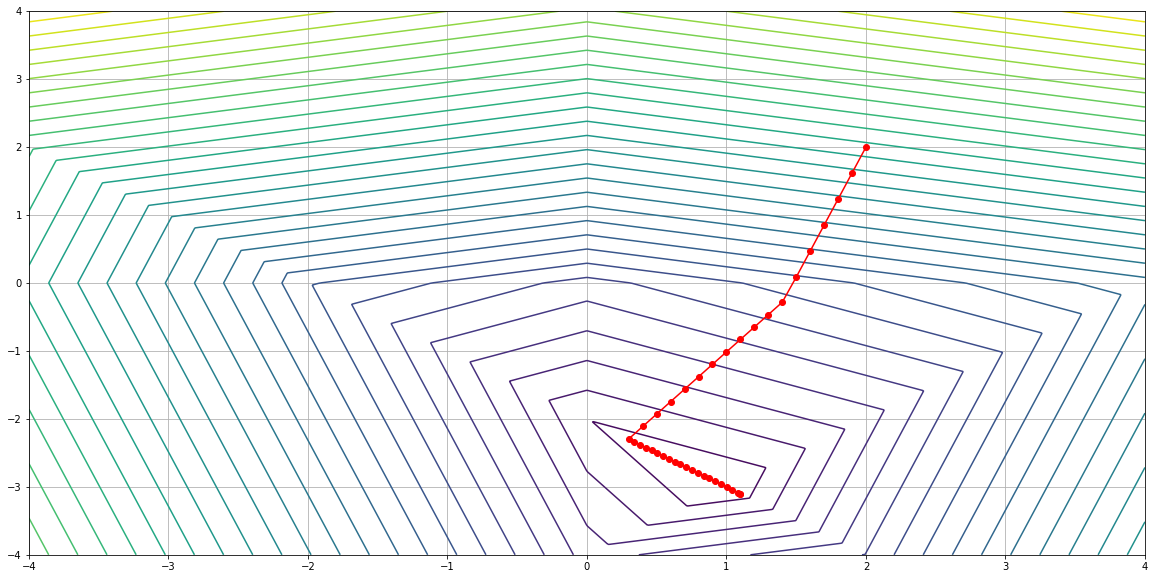

In [111]:
ax=[]
ay=[]
for e in listx4:
    ax=np.append(ax,e[0])
    ay=np.append(ay,e[1])
plt.figure(figsize=(20,10))
plt.plot(ax,ay ,'-ro')
plt.grid()
xx2 = np.linspace(-4, 4, 1000)
yy2 = np.linspace(-4, 4, 1000)
xxv, yyv = np.meshgrid(xx2, yy2)
z1= np.fabs(xxv)+np.fabs(yyv)
z2=r* np.abs( math.cos(theta)*(xxv-v[0])+math.sin(theta) *(yyv-v[1]))+r* np.abs( -math.sin(theta)*(xxv-v[0])+math.cos(theta) *(yyv-v[1]))    
z3=z1+z2
h = plt.contour(xxv,yyv,z3, 30)
plt.show()

## VII) Méthode d'Uzawa

On commence par associer à une fonction $f$ sont lagrangien $l$ comme au (12.1), on calcule aussi $\nabla_x l$.
Les constraintes d'inégalités $\gamma_i$ sont données dans une liste.

In [112]:
def lagrangian(f,  paramf, listg, listparamg, lagrange_mult, x):
    #f: la fonction à minimiser 
    # paramf: les parametres utiles à definir f
    # listg : une liste de contraintes d'inegalités
    # listparamg: une liste de parametres utiles à definir chaque fonctions de la liste listg
    # lagrange_mult: variable duale
    # x variable primale 
    fx=f(x, paramf)   #on evalue la fonction f 
    for l in range(len(listg)):
        fx=fx+lagrange_mult[l]* listg[l](x,listparamg[l]) #on evalue les contraintes d'inegalités * variable duale et on somme pour obtenir le lagrangien
    return fx
    
    
def gradx_lagrangian(gradf,  paramf, listgradg, listparamg, lagrange_mult, x):
    #gradf: le gradient de la fonction à minimiser  par rapport à x
    # paramf: les parametres utiles à definir gradf
    # listgradg : une liste des gradients des contraintes d'inegalités
    # listparamg: une liste de parametres utiles à definir chaque fonctions de la liste listgradg
    # lagrange_mult: variable duale
    # x variable primale   
    grad=gradf(x, paramf)   # on evalue le gradient de la fonction à minimiser 
    for l in range(len(listgradg)):
            grad=grad+lagrange_mult[l]* listgradg[l](x,listparamg[l])  # on ajoute les gradients des contraintes d'inegalités * variable duale et on somme pour obtenir le gradient du lagrangien
    
    return grad

Pour calculer $x_\mu$ du 12.3, on utilise une méthode de descente de gradient, on définit donc une méthode de backtracking pour le lagrangien, comme au I).

In [113]:
def back_tracking_lagrangian(f, gradf,  paramf, listg, listgradg,listparamg, lagrange_mult, x, d, mu, nu):
    # mu<=1/2 
    #nu<1
    #f: la fonction à minimiser
    #gradf: le gradient de la fonction à minimiser
    #paramf: les paramètres utiles à l'évaluation de f et de son gradient
    # listg : une liste de contraintes d'inegalités
    # listgradg : une liste des gradients des contraintes d'inegalités
    # listparamg: une liste de parametres utiles à definir chaque fonctions de la liste listg
    # lagrange_mult: variable duale fixee
    #x:  variable primale
    #d: direction de descente
    t=1                          #initialisation du pas
    lx=lagrangian(f,  paramf, listg, listparamg, lagrange_mult, x)   #evaluation du lagrangien
    grad=gradx_lagrangian(gradf,  paramf, listgradg, listparamg, lagrange_mult, x) #evaluation du gradient du lagrangien / variable primale
    aux=mu*np.dot(grad,d)          #sert au test d'arret
    y=x+t*d               # initialisation du point courant y
    ly=lagrangian(f,  paramf, listg, listparamg, lagrange_mult, y) #evaluation du lagrangien en y
    while ly > lx+t*aux:           #boucle de backtracking
       t=t*nu
       y=x+t*d
       ly=lagrangian(f,  paramf, listg, listparamg, lagrange_mult, y)
    return y     

Puis on programme la méthode de de descente de gradient pour minimiser le lagrangien dans la variable primale, la variable duale etant fixe, comme au II).

In [114]:
def gradient_and_backtracking_lagrangian( f, gradf ,paramf, g, gradg,paramg, x, lagrange_mult, tol, itmax):
    #f: la fonction à minimiser
    #gradf: le gradient de la fonction à minimiser
    #paramf: les paramètres utiles à l'évaluation de f et de son gradient
    # g : une liste de contraintes d'inegalités
    # gradg : une liste des gradients des contraintes d'inegalités
    # paramg: une liste de parametres utiles à definir chaque fonctions de la liste listg
    # lagrange_mult: variable duale fixee
    #x:  variable primale, le point courant
    #d: direction de descente
    # tol : tolérance pour le test d'arret
    # itmax : nombre maximal d'itérations
    muback=0.25   #parametres du line search
    nuback=0.8    #parametres du line search
    it=0          #compteur d'iterations
    grad=gradx_lagrangian(gradf,  paramf, gradg, paramg, lagrange_mult, x)   #evaluation du gradient du lagrangien / variable primale
    normgrad=la.norm(grad)    #norm du gradient
    while (normgrad>tol) and (it< itmax):   #boucle de la methode de gradient
         d=-grad/normgrad           # direction  de descente : le gradient
         x=back_tracking_lagrangian(f, gradf,  paramf, g, gradg,paramg, lagrange_mult, x, d, muback, nuback) #line search
         grad=gradx_lagrangian(gradf,  paramf, gradg, paramg, lagrange_mult, x)  #on evalue le gradient
         it=it+1
         normgrad=la.norm(grad)
    return x

## Programmer l'algorithme Uzawa défini en 12.3.
La fonction  retournera la valeur finale de  $x$ ainsi que la liste de tous les $x$ calculés.

In [118]:
def uzawa(n,f, gradf ,paramf, g, gradg,paramg, lagrange_mult, t, tol,  itmax):
    #f: la fonction à minimiser
    #gradf: le gradient de la fonction à minimiser
    #paramf: les paramètres utiles à l'évaluation de f et de son gradient
    # g : une liste de contraintes d'inegalités
    # gradg : une liste des gradients des contraintes d'inegalités
    # paramg: une liste de parametres utiles à definir chaque fonctions de la liste listg
    # lagrange_mult: variable duale: le point courant
    # t:le pas
    # tol : tolérance pour le test d'arret
    # itmax : nombre maximal d'itérations
    
    tol_unconstrained = 1e-6  #tolerance pour le test d'arret utilisé dans l'evaluation du critere dual
    itmax_unconstrained = 200 #nb d'iter max dans le test d'arret utilisé dans l'evaluation du critere dual
    x = np.zeros(n)      #initialisation de la variable primale
    listx = [x]          #liste des appxoximations su minimiseur du pb primal
    delta = 1            #norme de l'increment de x
    it = 0               # initialisation du compteur d'initialisation de Uzawa
    while it < itmax and delta > tol:
        
        x_k = listx[it]
        x = gradient_and_backtracking_lagrangian( f, gradf ,paramf, g, gradg,paramg, x_k,lagrange_mult, tol_unconstrained, itmax_unconstrained)
        
        # For-loop for mu computation 1:n
        for i in range(len(g)):
            gamma = g[i](x,paramg[i])
            lagrange_mult[i] = max(0, lagrange_mult[i]+t*gamma)
        
        delta = la.norm(x-listx[it])
        it += 1
        listx.append(x)
        
    print("Total iterations computed: ", it)
    print("Final x values: ", x)
    return x,listx

### Tester votre algorithme.

In [119]:
M=np.diag([1.0,4.0])
v=[0,-6]
paramf=[M,v]


# une contrainte quadratique de la forme 1/2<A1(x-v1),x-v1>-a1
def ineq_const_one(x, param):
    e=x-param[1]
    return 0.5 *np.dot(np.dot(param[0],e),e) -param[2]

def grad_ineq_const_one(x, param):
    e=x-param[1]    
    return np.dot(param[0],e)
    
def hessian_ineq_const_one(x, param):
    return param[0]

# une contrainte lineaire de la forme <v2,x>-a_2
def ineq_const_two(x, param):
    return np.dot(param[0],x)-param[1]

def grad_ineq_const_two(x, param):
    return param[0]
    
def hessian_ineq_const_two(x, param):
    return 0

#paramètres premiere containte: 
v1=np.zeros(2)
A1=np.diag(np.ones(2))
a1=10
paramg0=[A1,v1, a1]

#paramèetre deuxième constrainte

v2=np.array([1,-1])
a2=-3.0
paramg1=[v2,a2]

#liste des contraintes
paramg=[paramg0,paramg1]
g=[ineq_const_one, ineq_const_two]
gradg=[grad_ineq_const_one,grad_ineq_const_two]  
lagrange_mult=np.ones(2)

# on applique l'algorithme

[w,listx]=uzawa(n,quadratic, grad_quadratic ,paramf,  g, gradg, paramg, lagrange_mult,0.03, 1e-6,  10000)

Total iterations computed:  1300
Final x values:  [-4.28384501 -1.28403515]


On observe  la convergence de la suite des approximations superposées aux lignes de niveaux.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


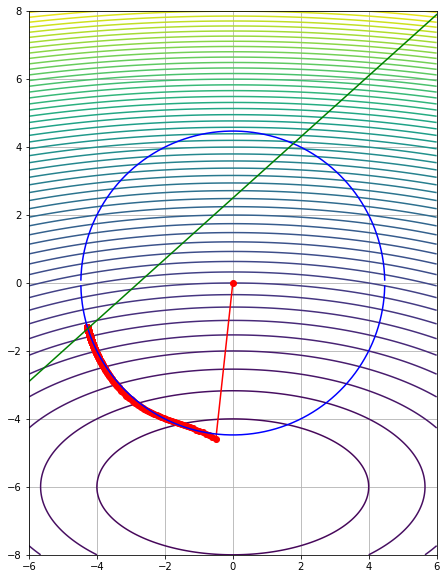

In [120]:
ax=[]
ay=[]
for v in listx:
    ax=np.append(ax,v[0])
    ay=np.append(ay,v[1])

xx=np.linspace(-math.sqrt(20),math.sqrt(20),10000)
yy=np.sqrt(20-xx*xx)
zz=-np.sqrt(20-xx*xx)
xx2=np.linspace(-5.9,4.9,1000)
tt=3+xx2

xx2 = np.linspace(-6, 6, 1000)
yy2 = np.linspace(-8, 8, 1000)
xxv, yyv = np.meshgrid(xx2, yy2)
z = 0.5*paramf[0][0,0]*(xxv-paramf[1][0])*(xxv-paramf[1][0])+0.5*paramf[0][1,1]*(yyv-paramf[1][1])*(yyv-paramf[1][1])
plt.figure(figsize=(20,10))
h2 = plt.contour(xxv,yyv,z, 60)

#zz=np.copy(xx)
#for i in range(1000):
#   yy[i]=sqrt(10-xx[i]*xx[i])
plt.grid()
plt.plot(ax,ay ,'-ro')
plt.plot(xx,yy,color='blue' )
plt.plot(xx,zz ,color="blue" )
plt.plot(xx2,tt ,color= "green" )
plt.gca().set_aspect('equal', adjustable='box')

plt.show()



## VIII) Algorithme ADMM 12.11

On commence par définir le lagrangien auguementé: $l_t(x,y,\mu)=f(x)+g(y) +\langle \mu , Ax- y\rangle + \frac{t}{2} \Vert Ax-y\Vert^2$ avec
$f(x)= \Vert x-v\Vert_1$
et
$g(y)=\frac{1}{2} \Vert By-y_0\Vert_2^2$
avec $x \in \mathbb{R}^2$, $y\in \mathbb{R}^3$, $A\in M_{3,2}$ et $B\in M_{3,3}$. 

On commence par définir la fonction $x \mapsto f(x)+g(Ax)$

In [146]:
def complete_function(x, paramf, paramg, A):
    #paramf=[v]
    #paramg=[B,y_0]
    v=x-paramf
    aux= abs(v[0])+abs(v[1])
    y=A@x
    z= paramg[0]@y-paramg[1]
    aux=aux+0.5* z.T@z
    return aux[0,0]

On définit la fonction auxiliaire $\psi(x) =\frac{t}{2} \Vert Ax-y\Vert_2^2 +\langle \lambda,Ax\rangle $. 
$A$, $y$, $\lambda$ et $t$ sont donnés en paramètre. Elle nous servira pour étudier le lagrangien augmenté: $l_t(x,y,\lambda)=f(x)+g(y) +\langle \lambda , Ax- y\rangle + \frac{t}{2} \Vert Ax-y\Vert^2$


In [147]:
# psi(x)= t/2 ||Ax-y||_2^2+ lambdaˆT Ax
#parampsi=[A,y,Lambda,t]

def psi(x, parameters):
    w=parameters[0]@x
    v=w-parameters[1]
    return parameters[3]/2* v.T@v +parameters[2].T @ w

def gradpsi(x, parameters):
    w=parameters[0]@x
    z=parameters[3]*(w-parameters[1])+parameters[2]
    return parameters[0].T@z

### VIII.1) Définir une fonction qui donne le point proximal de $x\mapsto \Vert x-v\Vert_1$

In [148]:
def proxi_norm_un_(x, v, t):
    #point proximal pour x-> ||x-v||_1
    #on minimise z-> 2t||z-v||_1+ ||z-x||_2^2
    z = []
    for i in range(len(x)):
        #Initialize x-v value for every element of x and v
        x_i = x[i] - v[i]
        
        if x_i > t:
            z.append(x_i - t + v[i])
            
        elif x_i >= -t and x_i <= t:
            z.append(v[i])
            
        elif x_i<-t:
            z.append(x_i + t + v[i])
            
    return np.array(z)

### VII.2) Première étape: 
Écrire une fonction qui minimise le lagrangien augmenté par rapport à x.
Pour cela on utilise une méthode explicite-implicite comme 8.3 avec $f_1=\psi$ et $f_2=f=\Vert\, . \, -v\Vert_1$

In [149]:
def fixed_step_explicit_implicit2(psi, gradpsi,parampsi, x, v, t,tol,itmax):
    delta=1
    deltav=[]
    listx=[x]
    it=0
    deltav.append(delta)
    
    while delta > tol and it < itmax:
        x_k = listx[it]
        y_k = x_k - t*gradpsi(x_k, parampsi)
        x = proxi_norm_un_(y_k, v, t)
        
        delta = la.norm(x-x_k)
        deltav.append(delta)
        listx.append(x)
        
        it += 1
    return x

def ADDM_step1(A,y, Lambda, paramf,t,x, tol,itmax):
    parampsi=[A,y,Lambda,t]
    x=fixed_step_explicit_implicit2(psi, gradpsi,parampsi, x, paramf, t/100,tol,itmax)
    return x

### VIII.3) Deuxième étape: 
Écrire une fonction qui minimise le lagrangien auguementé par rapport à $y$.
Ici il s'agit d'une fonction quadratique il suffit de trouver explicitement le point où le gradient s'annule.

In [150]:
def ADDM_step2(x, Lambda, paramg, A, t):
    # We need to find the gradient of y for the lagrangien = g(y) - <Lambda, y> + t/2*||Ax-y||_2^2
    # Computation done by hand || grad(lag(y)) = (BˆT*B +t)y - B^T*y0 - tAx - Lambda
    # (BˆT*B +t)y = B^T*y0 + tAx + Lambda || Finds the point where the gradient is equal to zero
    B = paramg[0]
    y0 = paramg[1]
    
    a = np.dot(B.T,B) + t
    b = np.dot(B.T,y0) + t*np.dot(A,x) + Lambda
    
    y = la.solve(a, b)
    return y

### VIII.4 Troisième étape: 
écrire une fonction qui met à jour $\lambda$.

In [151]:
def ADDM_step3(Lambda,x,y, A, t):
    #Formula definition for calculating lambda_k1
    Lambda = Lambda + t*(np.dot(A,x)-y)
    return Lambda

### VIII.4) Écrire une fonction qui execute l'algorithme ADMM complet

In [152]:
def ADMM(paramf, paramg, A, x,y, Lambda, t, tol, itmax):
    er=1 # puis on initialise avec la.norm (x_{k+1}-x_k)+la.norm (y_{k+1}-y_k)+la.norm (Lambda_{k+1}-lambda_{k})
    xiter=[x]
    val=[] # on stock les valeurs complete_function(x, paramf, paramg, A)
    it = 0 
    while er > tol:
        x_k = xiter[it] 
        y_k = y
        lambda_k = Lambda
        
        # 3 steps of the algorithm for calculating x, y and Lambda
        x = ADDM_step1(A, y, lambda_k, paramf, t, x_k, tol, itmax)
        
        y = ADDM_step2(x, lambda_k, paramg, A, t)
        
        Lambda = ADDM_step3(lambda_k, x, y, A, t)
        #---------------------------------------------------------
        
        xiter.append(x)
        er = la.norm(x-x_k) + la.norm(y-y_k) + la.norm(Lambda-lambda_k)
        val.append(complete_function(x, paramf, paramg, A))
        
        it += 1
    print("Total iterations computed: ", it)
    print("\nFinal x values: \n", x)
    print("\nFinal y values: \n", y)
    print("\nFinal Lambda: \n", Lambda)
    return x, y, Lambda, xiter, val


### Tester votre algorithme.

In [167]:
paramf= np.ones((2,1))

A=[1,2,3,1,1,1]
A=np.reshape(A, (3,2))

B=[4 ,-1 ,-1, -1, 4, -1, -1, -1, 4]
B=0.15* np.reshape(B, (3,3))
y0=[0.5,1,0.5]
y0=np.reshape(y0,(3,1))

paramg=[]
paramg.append(B)
paramg.append(y0)

x=np.zeros((2,1))
x[0,0]=1.4

y=np.zeros((3,1))
Lambda=np.zeros((3,1))

t=0.002 #Hyperparameter modified for convergence of function minimisation
[x,y,Lambda, xiter,valiter]=ADMM(paramf, paramg, A, x, y, Lambda, t, 1e-5,200)

Total iterations computed:  1838

Final x values: 
 [[0.99943268]
 [1.        ]]

Final y values: 
 [[2.99840914]
 [3.99817771]
 [2.00071531]]

Final Lambda: 
 [[ 0.20652784]
 [ 0.39189812]
 [-0.35267955]]


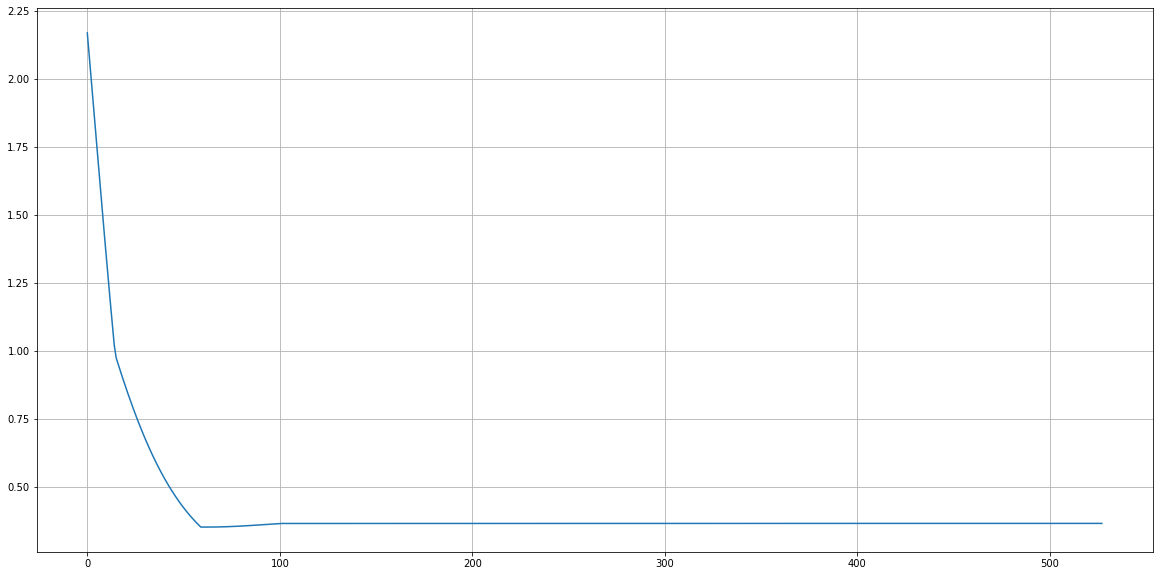

In [165]:
plt.figure(figsize=(20,10))
plt.plot(valiter)
plt.grid()
plt.show()

On observe également la convergence de la suite des approximations superposées aux lignes de niveaux.

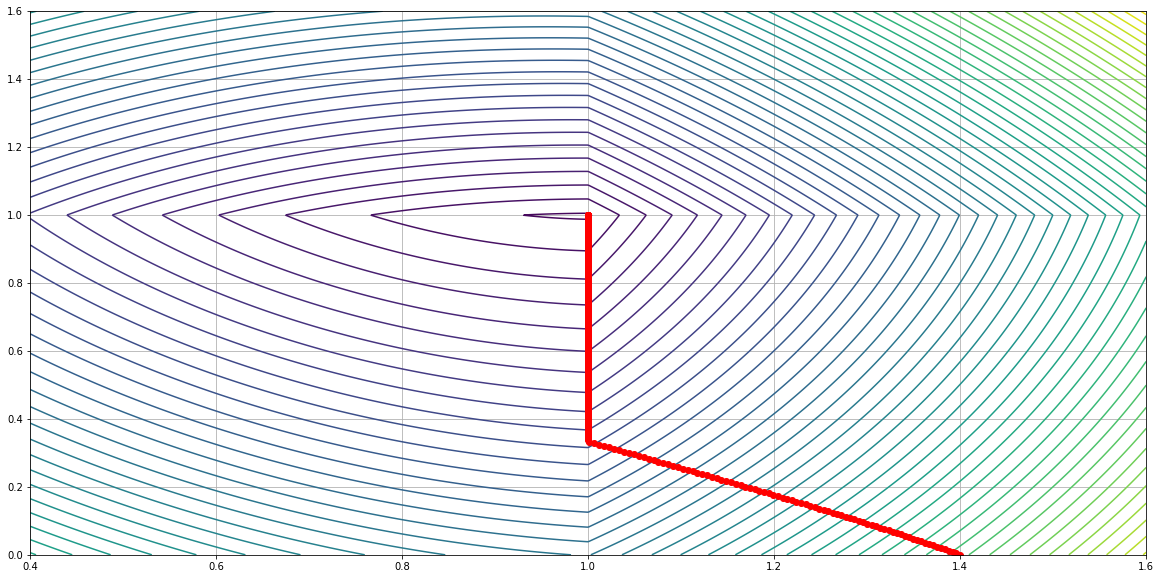

In [168]:
ax=[]
ay=[]
for v in xiter:
    ax=np.append(ax,v[0])
    ay=np.append(ay,v[1])
    
plt.figure(figsize=(20,10))
plt.plot(ax,ay ,'-ro')
plt.grid()

xx2 = np.linspace(0.4, 1.6, 1000)
yy2 = np.linspace(0.0, 1.6, 1000)
xxv, yyv = np.meshgrid(xx2, yy2)

val=np.zeros(np.shape(xxv))
for i in range(np.shape(xxv)[0]):
    for j in range(np.shape(xxv)[1]):
        v=np.zeros((2,1))
        v[0,0]=xxv[i,j]
        v[1,0]=yyv[i,j]
        val[i,j]=complete_function(v, paramf, paramg, A)  
    
h = plt.contour(xxv,yyv,val, 50)
plt.show()